# Transformation examples

## Introduction
This notebook illustrates some tranformation capabilities provided by plaid-ops. 

In [1]:
import logging

import pyvista as pv
from datasets import load_dataset
from plaid.bridges.huggingface_bridge import (
    huggingface_dataset_to_plaid,
    huggingface_description_to_problem_definition,
)

pv.set_jupyter_backend("static")
logging.getLogger().setLevel(logging.WARNING)
from plaid_ops.common.visualization import plot_sample_field

hf_dataset = load_dataset(
    "PLAID-datasets/2D_Multiscale_Hyperelasticity", split="all_samples"
)
pb_def = huggingface_description_to_problem_definition(hf_dataset.info.description)
ids = pb_def.get_split("DOE_train")[:10]

dataset, _ = huggingface_dataset_to_plaid(hf_dataset, ids=ids, processes_number=5)
print(dataset)

Kokkos::OpenMP::initialize WARNING: OMP_PROC_BIND environment variable not set
  In general, for best performance with OpenMP 4.0 or better set OMP_PROC_BIND=spread and OMP_PLACES=threads
  For best performance with OpenMP 3.1 set OMP_PROC_BIND=true
  For unit testing set OMP_PROC_BIND=false



Converting huggingface dataset to plaid dataset...


100%|██████████| 10/10 [00:00<00:00, 257.18it/s]

Dataset(10 samples, 4 scalars, 0 time_series, 7 fields)


In [2]:
print(dataset[0])

Sample(4 scalars, 0 time series, 1 timestamp, 7 fields)


In [3]:
from plaid_ops.mesh.feature_engineering import update_dataset_with_sdf

dataset = update_dataset_with_sdf(dataset)
print(dataset[0])

Sample(4 scalars, 0 time series, 1 timestamp, 8 fields)


In [5]:
from plaid_ops.mesh.transformations import compute_bounding_box, project_on_regular_grid

bbox = compute_bounding_box(dataset)
projected_dataset = project_on_regular_grid(
    dataset, dimensions=[401, 401], bbox=bbox, verbose=True
)

print(projected_dataset)

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:01<00:00,  5.49it/s]

Dataset(10 samples, 4 scalars, 0 time_series, 8 fields)


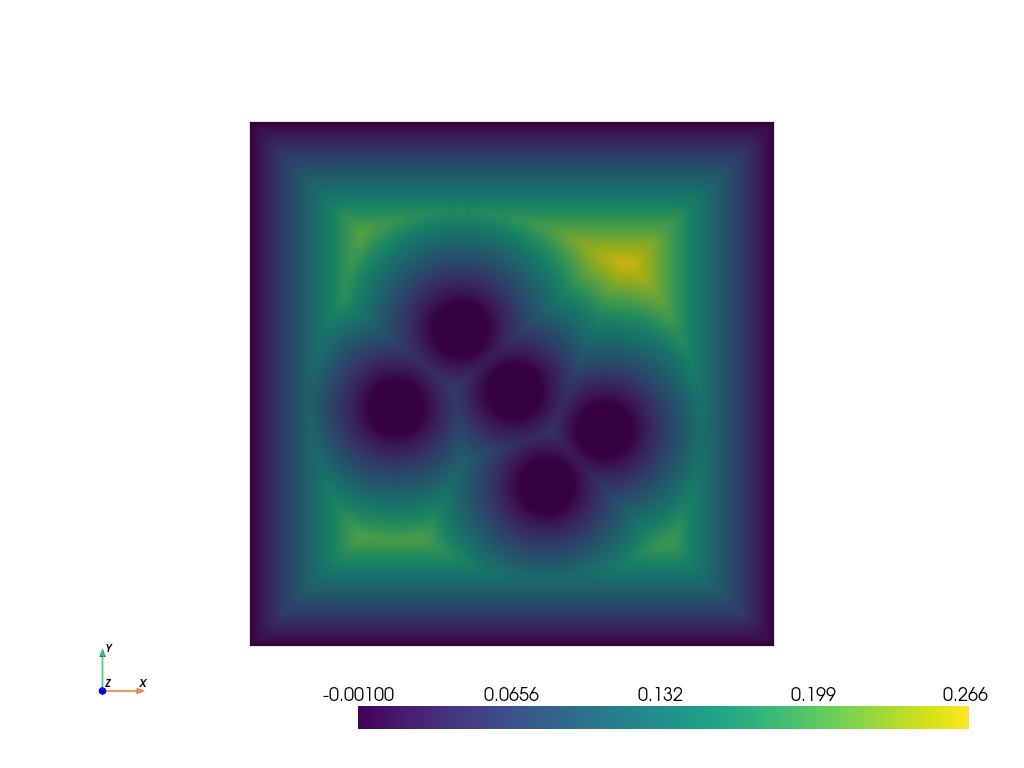

In [6]:
plot_sample_field(projected_dataset[0], "sdf", show_edges=False)

In [7]:
from plaid_ops.mesh.transformations import project_on_other_datset

inv_projected_dataset = project_on_other_datset(
    projected_dataset, dataset, verbose=True
)

100%|██████████| 10/10 [00:03<00:00,  3.16it/s]


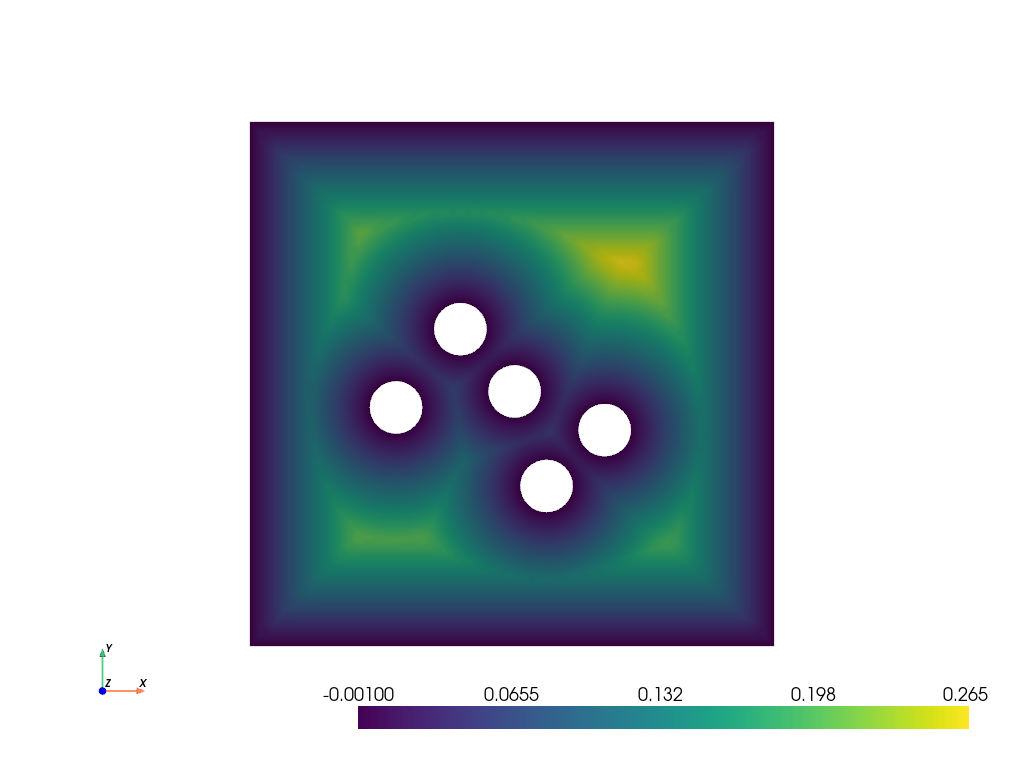

In [8]:
plot_sample_field(inv_projected_dataset[0], "sdf", show_edges=False)

In [9]:
print(inv_projected_dataset)

Dataset(10 samples, 4 scalars, 0 time_series, 8 fields)
